<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 2: Overview of Programming languages and Systems</h1>
</div>


## Learning Objectives

* Programming languages
  - Describe the differences between a high level and low level programming language
  - Describe the differences between an interpreted and compiled language
  - Describe the differences between a static and dynamically typed language
  - Know that there are different programming paradigms such as imperative and functional
  - Describe the different memory management techniques
  - Be able to identify the the properties of a particular language such as rust.

* Systems Concepts
  - Understand high level components of a computer such as CPU, memory, and I/O
  - Be able to convert between different bases, such as decimal, binary, and hexadecimal
  - Understand memory hierarchy, caches and virtual memory

---

# Programming Languages

## Various Language Levels

* Native code
  - usually compiled output of a high-level language, directly executable on target processor

* Assembler
  - low-level but human readable language that targets processor
  - pros: as fine control as in native code
  - cons: not portable


* High level languages
  - various levels of closeness to the architecture: from C to Prolog
  - efficiency:
    - varies
    - could optimize better
  - pros:
    - very portable
    - easier to build large projects
  - cons:
    - some languages are resource–inefficient

## Assembly Language Examples

```asm
  ARM                          X86
. text                       section .text
.global _start                 global _start
_start:                      section .data
   mov r0, #1                msg db  'Hello, world!',0xa
   ldr r1, =message          len equ 0xe
   ldr r2, =len              section .text
   mov r7, #4                _start:
   swi 0                     mov edx,len ;message length
   mov r7, #1                mov ecx,msg ;message to write
                             mov ebx,1   ;file descriptor (stdout)
.data.                       mov eax,4   ;system call number (sys_write)
message:                     int 0x80    ;call kernel
   .asciz "hello world!\n"   mov ebx,0   ;process' exit code
len = .-message.             mov eax,1   ;system call number (sys_exit)
                             int 0x80    ;call kernel - this interrupt won't return
```

## Interpreted vs. compiled

### Interpreted:

* An application (*interpreter*) reads commands one by one and executes them.
* One step process to run an application:
  - `python hello.py`

### ("Fully") Compiled:

 * Translated to native code by *compiler*
 * Usually more efficient
 * Two steps to execute:
   1. Compile (Rust: `rustc hello.rs`)
   2. Run (Rust: `./hello`)
   
Compiled to Intermediate Representation (IR):
 * Example: Java
   - Portable intermediate format
   - Needs another application, Java virtual machine, that knows how to interpret it
 * Example: Python
   - Under some circumstances Python bytecode is created and cached in `__pycache__`
   - Python bytecode is platform independent and executed by the Python Virtual Machine
   
Just-in-Time (JIT) compilation is an interesting wrinkle in that it can take interpreted and intermediate format languages and compile them down to machine code.

## Type checking: static vs. dynamic

Dynamic (e.g., Python):
* checks if an object can be used for specific operation during runtime
* pros:
  - don't have to specify the type of object
  - procedures can work for various types
  - faster or no compilation
* cons:
  - slower at runtime
  - problems are detected late



Let's run the following python code.

In [1]:
def add(x,y):
    return x + y

print(add(2,2))
print(add("a","b"))
print(add(2,"b"))

4
ab


TypeError: unsupported operand type(s) for +: 'int' and 'str'

There is optional typing specification, but it is not enforced, e.g. accepting ints.

In [3]:
import typing
def add(x:str, y:str) -> str:
    return x + y
print(add(2,2))    # doesn't complain about getting integer types
print(add("ab", "cd"))
#print(add(2,"n"))

4
abcd


* You can use packages such as `pyright` or `mypy` as a type checker before running your programs
* Supported by VSCode python extension

## Type checking: static vs. dynamic

Static (e.g, C++, Rust, OCaml, Java):
* checks if types of objects are as specified
* pros:
  - faster at runtime
  - type mismatch detected early
* cons:
  - often need to be explicit with the type
  - making procedures generic may be difficult
  - potentially slower compilation



C++:
```C++
int add(int x, int y) {
    return x + y;
}
```

Rust:
```rust
fn add(x:i32, y:i32) -> i32 {
    x + y
}
```

## Type checking: static vs. dynamic

**Note:** some languages are smart and you don't have to always specify types (e.g., OCaml, Rust)

Rust:
```rust
let x : i32 = 7;
let y = 3;    // Implied to be default integer type
let z = x * y;  // Type of result derived from types of operands
```

## Various programming paradigms
* Imperative
* Functional
* Object-oriented
* Declarative / programming in logic

### Imperative

**im·per·a·tive** (adjective) -- give an authoritive command

```python
# Python -- Imperative
def factorial(N):
    ret = 1
    for i in range(N):
        ret = ret * i
    return ret
```

### Functional

```Scheme
; Scheme, a dialect of lisp -- functional

(define (factorial n) (cond ((= n 0) 1) 
                            (t (* n (factorial (- n 1)))))) 
```

### Object Oriented

```c++
// C++ -- Object oriented pattern
class Factorial {
   private:
     int64 value;
   public:
     int64 factorial(int input) {
        int64 temp = 1;
        for(int i=1; i<=input; i++) {
            temp = temp * i;
        }
        value = temp
     }
     int64 get_factorial() {
        return value;
     }
}
```

### Declarative/Logic

```prolog
% Prolog -- declaritive / programming in logic
factorial(0,1).      % Base case
factorial(N,M) :-
    N>0,             % Ensure N is greater than 0
    N1 is N-1,       % Decrement N
    factorial(N1, M1),  % Recursive call
    M is N * M1.     % Calculate factorial
```

## Memory management: manual vs. garbage collection

At least 3 kinds:

1. Manual (e.g. C, C++)
2. Garbage collection (e.g. Java, Python)
3. Ownership-based (e.g. Rust)

### Manual

* Need to explicitly ask for memory and return it
* pros:
  - more efficient
  - better in real–time applications
* cons:
  - more work for the programmer
  - more prone to errors
  - major vector for attacks/hacking

Example below in C++.

### Garbage collection

* Memory freed automatically
* pros:
  - less work for the programmer
  - more difficult to make mistakes
* cons:
  - less efficient
  - can lead to sudden slowdowns

### Ownership-Based

* Keeps track of memory object ownership
    * Allows borrowing, references without borrowing, move ownership
* When object goes out of scope, Rust automatically deallocates
* Managed deterministically at compile-time, not run-time like garbage collection

We'll dive deeper into Rust ownership later.

## Rust Language (Recap)

* high–level

* compiled

* static type checking

* <b> ownership-based memory management </b>

## Most important difference between Python and Rust?

<div align="center">
    <h3>Rust uses braces, <tt>{  }</tt>, for code scoping!</h3>
    😃😃😃
</div>

How do we denote blocks of code?

  - Python: indentation
  - Rust: `{...}`
 
| Language | formatting | scoping |
| -------- | ---------- | ------- |
| Python   | indentation | indentation |
| Rust     | indentation | braces, {} |

### Example in Rust

```rust
fn hi() {
    println!("Hello!");
    println!("How are you?");
}
```

> Don't be afraid of braces!!! You'll encounter them in C, C++, Java, Javascript, PHP, Rust, ...

---


## Memory Structure of an Executable Program

It's very helpful to have conceptual understanding of how memory is structured in executable programs.

The figure below illustrates a typical structure, where some low starting memory address is at the bottom and then memory addresses increase as you go up in the figure.


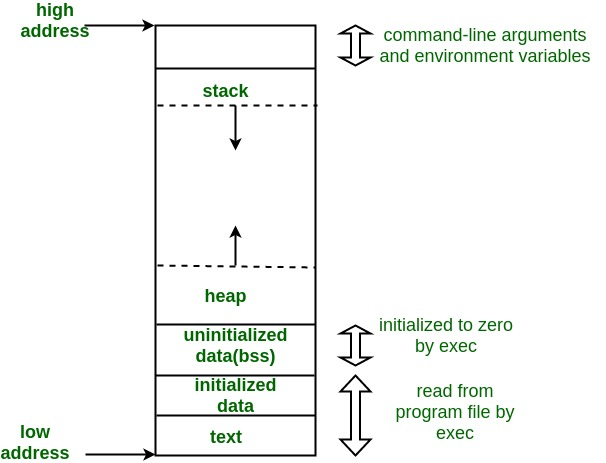

Here's a short description of each section starting from the bottom:

1. **text** -- the code, e.g. program instructions
2. **initialized data** -- explicitly initialized global/static variables
3. **uninitialized data (bss)** -- uninitialized global/static variables, generally auto-initialied to zero. BSS -- Block Started by Symbol
4. **heap** -- dynamically allocated memory. grows as structures are allocated
5. **stack** -- used for local variables and function calls

---

## Example of unsafe programming in C

Let's take a look at the problem with the following C program which asks
you to guess a string and hints whether your guess was lexically less or greater.

Try with:
1. guesses of string length <= 20
2. guesses of string length > 20
3. guesses of string length >> 20

> Lecture Note: Switch to code

```c
#include <signal.h>
#include <stdio.h>
#include <string.h>
#include <stdlib.h>
int main(){
    char loop_bool[20];
    char secretString[20];
    char givenString[20];
    char x;
    int i, ret;

    memset(&loop_bool, 0, 20);
    for (i=0;i<19;i++) {
      x = 'a' + random() % 26; 
      secretString[i] = x;
    }
    printf("secretString: %s\n", secretString);
    while (!loop_bool[0]) { 
        gets(givenString);
        ret = strncmp(secretString, givenString, 20);
        if (0 == ret) {
            printf("SUCCESS!\n");
	    break;
	}else if (ret < 0){
	    printf("LESS!\n");
	} else {
	    printf("MORE!\n");
        }
        printf("secretString: %s\n", secretString);
    }
    printf("secretString: %s\n", secretString);
    printf("givenString: %s\n", givenString);
    return 0;
}
```

---

## A Brief Aside -- The people behind the languages

### Who are these people?
* Guido Van Rossum
* Graydon Hoare
* Bjarne Stroustrup
* James Gosling
* Brendan Eich
* Brian Kernighan and Dennis Ritchie

<br><br><br>

### Who are these people?
* Guido Van Rossum  --  Python
* Graydon Hoare  --  Rust
* Bjarne Stroustrup  -- C++
* James Gosling  --  Java
* Brendan Eich  --  Javascript
* Brian Kernighan and Dennis Ritchie  -- C

<div align="center">
    <h1>Basic System Concepts</h1>
</div>


## Topics
1. Numbering Systems
2. The Von Neumann Architecture
3. Memory Hierarchy and Memory Concepts
4. Trends, Sizes and Costs

## Numbering Systems

* Decimal (0-9) e.g. 1724
* Binary (0-1) e.g. 0b011000 (24 decimal)
* Octal (0-7) e.g. 0o131 (89 decimal)
* Hexadecimal (0-9, A-F) e.g 0x13F (319 decimal)

### Converting between numbering systems

#### For any base b to decimal.  Assume number C with digits $C_kC_{k-1}...C_2C_1C_0$

$\large D = \sum_{i=0}^{k} C_i * b^i$

#### Between octal and binary

Every octal digit corresponds to exactly 3 binary digits and the reverse.  For example `0o34 = 0b011_100`.  Traverse numbers right to left and prepend with 0s if necessary.

#### Between hexadecimal and binary
Every hexadecimal digit corresponds to exactly 4 binary digits and the reverse.  For example `0x3A = 0b0011_1010`.  Traverse numbers right to left and prepend with 0s if necessary.

#### Between decimal and binary (or any base b)
More complicated.  Divide repeatedly by 2 (or the base b) and keep the remainder as the next most significant binary digit.  Stop when the division returns 0.

```
i = 0 
while D > 0:
  C[i] = D % 2 # modulo operator -- or substitute 2 for any base b
  D = D // 2 # floor division -- or substitute 2 for any base b
  i += 1
```

#### What about between decimal and octal/hexadecimal
You can use the same logic as for binary or convert to binary and then use the binary to octal/hexadecimal simple conversions

## The Von Neuman Architecture

Named after the [First Draft of a Report on the EDVAC](https://en.wikipedia.org/wiki/First_Draft_of_a_Report_on_the_EDVAC) written
by mathematician John von Neuman in 1945.

Most processor architectures are still based on this same model.

<div style="text-align: center;">
  <img src="Von_Neumann_Architecture.svg" alt="von Neumann Architecture" style="width: 70%;">
</div>
<!-- https://en.wikipedia.org/wiki/Von_Neumann_architecture#/media/File:Von_Neumann_Architecture.svg -->


### Key Components

1. Central Processing Unit (CPU):
    - The CPU is the core processing unit responsible for executing instructions and performing computations. It consists of:
    - Control Unit (CU):
        - Directs the operations of the CPU by interpreting instructions and coordinating data flow between the components.
        - Controls the flow of data between the input, memory, and output devices.
    - Arithmetic/Logic Unit (ALU):
        - Performs arithmetic operations (e.g., addition, subtraction) and logical operations (e.g., AND, OR, NOT).
        - Acts as the computational engine of the CPU.
2. Memory Unit:
    - Stores data and instructions needed for processing.
    - The memory serves as temporary storage for instructions being executed and intermediate data.
    - It communicates with both the CPU and input/output devices.
3. Input Device:
    - Provides data or instructions to the CPU.
    - Examples include keyboards, mice, and sensors.
    - Data flows from the input device into the CPU for processing.
4. Output Device:
    - Displays or transmits the results of computations performed by the CPU.
    - Examples include monitors, printers, and actuators.


### Also known as the stored program architecture

Both data and program stored in memory and it's just convention which parts of memory contain instructions and which ones contain variables.

Two very special registers in the processor: Program Counter (PC) and Stack Pointer (SP)

PC:  Points to the next instruction.  Auto-increments by one when instruction is executed with the exception of branch and jmp instructions that explicitly modify it.   Branch instructions used in loops and conditional statements.  Jmp instructions used in function calls. 

SP: Points to beginning of state (parameters, local variables, return address, old stackpointer etc) for current function call.



## Intruction Decoding

Use the Program Counter to fetch the next instruction.  After fetching you have to decode it, and subsequently to execute it.

Decoding instructions requires that you split the instruction number to the opcode (telling you what to do) and the operands (telling what data to operate one)

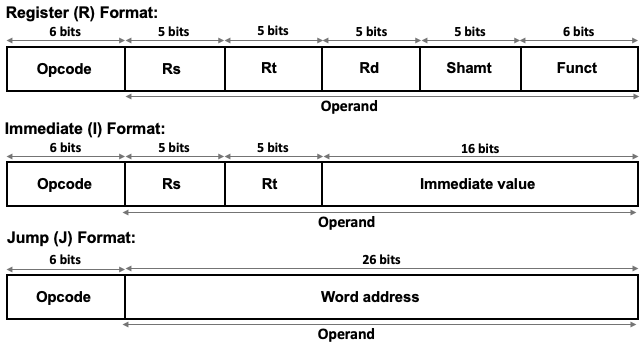

_Example from MIPS (Microprocessor without Interlocked Pipeline Stages) Intruction Set Architecture (ISA). MIPS is RISC (Reduced Instruction Set Computer)._

## The time cost of operations

_Assume for example a processor clocked at 2 GHz, e.g. $( 2\times 10^9 )$._

* Executing an instruction ~ 0.5 ns _(1 clock cycle)_
* Getting a value (4 bytes) from L1 cache ~1 ns
* Branch mispredict ~3 ns
* Getting a value from L2 cache ~4 ns
* Send 1Kbyte of data over 1Gbps network (just send not arrive) ~ 16 ns
* Get a value from main memory ~100 ns
* Read 1MB from main memory sequentially ~1000 ns
* Compress 1Kbyte (in L1 cache) with zippy ~2000 ns
* Read 1MB from SSD ~49,000 µs
* Send a ping pong packet inside a datacenter ~500,000 ns
* Read 1Mbyte from HDD ~825,000 ns
* Do an HDD seek ~2,000,000 ns
* Send a packet from US to Europe and back ~150,000,000 ns

https://samwho.dev/numbers/


## The memory hierarchy and memory concepts

We've talked about different kinds of memory. It's helpful to think of it in terms of a hierarchy.

* As indicated above, registers are closest to the processor and fastest.
* As you move farther away, the size gets larger but access gets slower

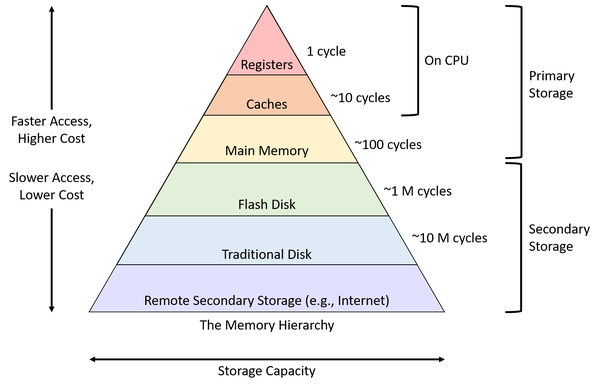

The following figure from _Hennesy and Patterson_ is also very informative.

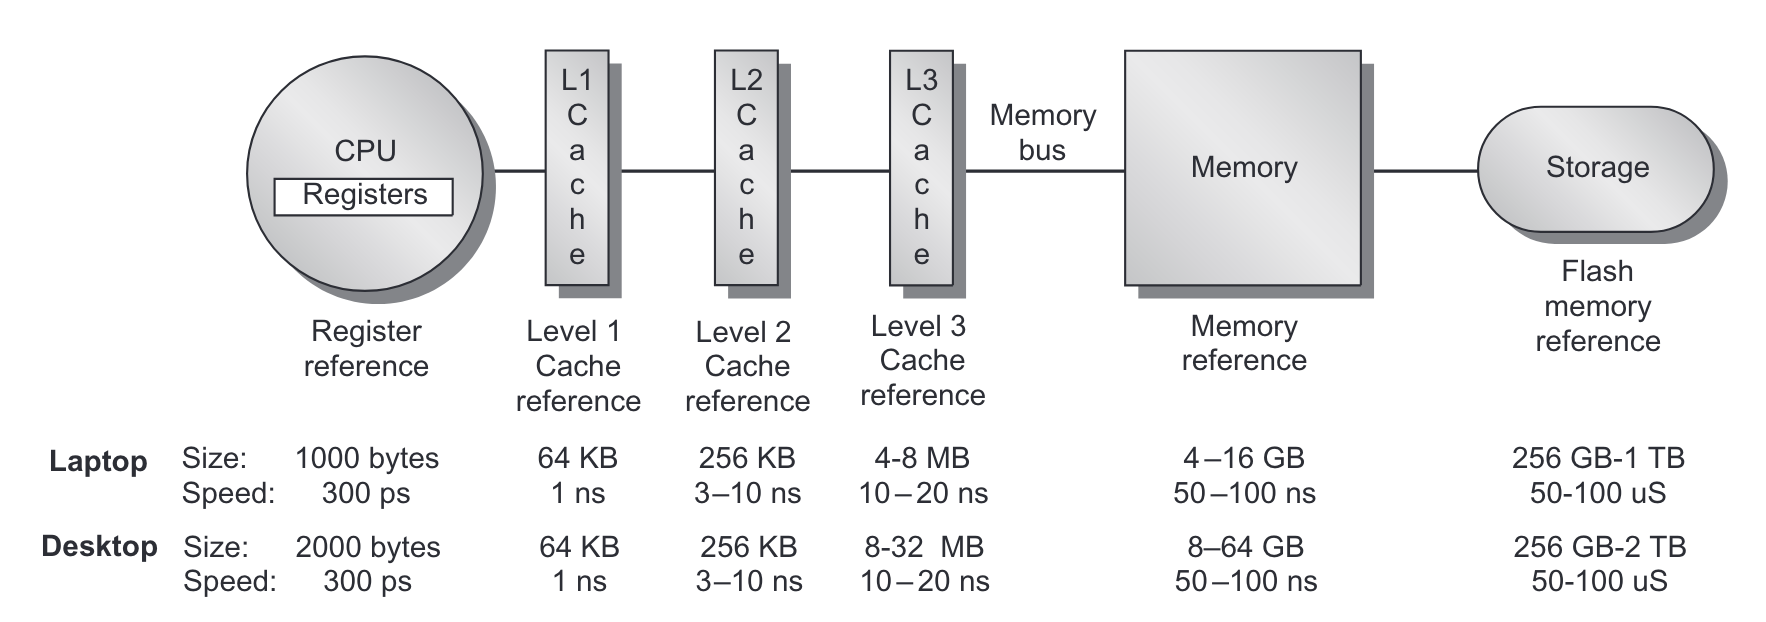
From _Hennesy and Patterson, Computer Architecture: A Quantitative Approach__.

When the CPU tries to read from a memory location it

- First checks if that memory location is copied to L1 cache
    - if it is, then the value is returned
    - if it is not...
- Then checks if the memory location is copied to L2 cache
    - if it is, then the value is copied to L1 cache and returned
    - if it is not...
- Then checks if the memory location is copied to L3 cache
     - if it is, then the value is copied to L2, then L1 and returned
     - if it is not...
- Go to main memory
    - fetch a _cache line_ size of data, typically 64 bytes (__why?__)

### More on Caches

* Each _cache line_ size of memory can be mapped to one of $N$ _cache slots_ in each cache
* we say such a cache is $N$-way
* if all $N$ slots are occupied, then we evict the Least Recently Used (LRU) slots


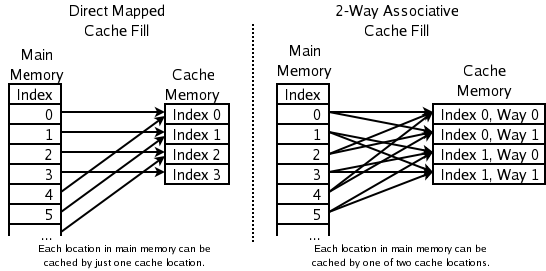

_Direct mapped versus 2-way cache mapping._ 
[Wikipedia: CPU cache](https://en.wikipedia.org/wiki/CPU_cache)


We can see the cache configuration on a Linux system with the `getconf` command.

Here's the output from the MOC.

```sh
$ getconf -a | grep CACHE
LEVEL1_ICACHE_SIZE                 32768  (32KB)
LEVEL1_ICACHE_ASSOC                8
LEVEL1_ICACHE_LINESIZE             64

LEVEL1_DCACHE_SIZE                 32768  (32KB)
LEVEL1_DCACHE_ASSOC                8
LEVEL1_DCACHE_LINESIZE             64

LEVEL2_CACHE_SIZE                  1048576 (1MB)
LEVEL2_CACHE_ASSOC                 16
LEVEL2_CACHE_LINESIZE              64

LEVEL3_CACHE_SIZE                  23068672 (22MB)
LEVEL3_CACHE_ASSOC                 11
LEVEL3_CACHE_LINESIZE              64

LEVEL4_CACHE_SIZE                  0
LEVEL4_CACHE_ASSOC                 0
LEVEL4_CACHE_LINESIZE              0
```

How many way associative are they?

Why is 32kb not 32,000?  When is K 1,000?

An 8-way associative cache with 32 KB of size and 64-byte blocks divides the cache into 64 sets, each with 8 cache lines. Memory addresses are mapped to specific sets.



####  Benefits of 8-Way Associativity:

1. Reduces Conflict Misses:
    - Associativity allows multiple blocks to map to the same set, reducing the likelihood of eviction due to conflicts.
2. Balances Complexity and Performance:
    - Higher associativity generally improves hit rates but increases lookup complexity. An 8-way cache strikes a good balance for most applications.


### Cache Use Examples

Example from this [blog post](https://mecha-mind.medium.com/demystifying-cpu-caches-with-examples-810534628d71).

**Contiguous read loop**

![](./contig_read.png)


```c++
// cache1.cpp

#include <time.h>
#include <stdio.h>
#include <stdlib.h>

/*
 * Contiguous access loop
 * 
 * Example from https://mecha-mind.medium.com/demystifying-cpu-caches-with-examples-810534628d71
 *
 * compile with `clang cache.cpp -o cache`
 * run with `./cache`
 */

int main(int argc, char* argv[]) {
    const int length = 512 * 1024 * 1024;   // 512M
    const int cache_line_size = 16;  // size in terms of ints (4 bytes) so 16 * 4 = 64 bytes
    const int m = length/cache_line_size;  // 512M / 32 = 32M

    printf("Looping %d M times\n", m/(1024*1024));

    int *arr = (int*)malloc(length * sizeof(int)); // 512M length array

    clock_t start = clock();
    for (int i = 0; i < m; i++)   // loop 32M times with contiguous access
        arr[i]++;
    clock_t stop = clock();
    
    double duration = ((double)(stop - start)) / CLOCKS_PER_SEC * 1000;
    
    printf("Duration: %f ms\n", duration);

    free(arr);
    return 0;
}
```



When running on Apple M2 Pro.

```sh
% clang cache1.cpp -o cache1
% ./cache1
Looping 32 M times
Duration: 54.166000 ms
```

<br><br><br>


Now let's modify the loop to jump by intervals of `cache_line_size`

**Noncontiguous Read Loop**

![](./noncontig_read.png)

```c++
// cache2.cpp

    for (int i = 0; i < m*cache_line_size; i+=cache_line_size) // non-contiguous access
        arr[i]++;
    clock_t stop = clock();
```

```sh
% ./cache2
Looping 32 M times
Duration: 266.715000 ms
```

About **5X** slower. What happened?




**Noncontiguous with 2x cache line jump**

We loop **half** the amount of times!!

```c++
    for (int i = 0; i < m*cache_line_size; i+=2*cache_line_size) {
        arr[i]++;
        arr[i+cache_line_size]++;
    }
```

When running on Apple M2 Pro.

```sh
% ./cache3
Looping 16 M times
Duration: 255.551000 ms
```
<br><br><br><br>


### Caches on multi-processor systems

For multi-processor systems (which are now standard), memory hierarchy looks something like this:

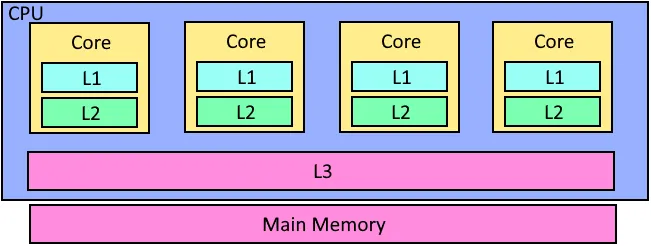

In other words, each core has it's own L1 and L2 cache, but the L3 cache and of course main memory is shared.


# Virtual Memory, Page Tables and TLBs

* The addressable memory address range is much larger than available physical memory
* Every program thinks it can access every possible memory address.  
    * And there has to exist some security to prevent one program from modifying the memory occupied by another.  
* The mechanism for that is virtual memory, paging and address translation



<div style="text-align: center;">
  <img src="Virtual_address_space.svg" alt="Virtual and physical addresses" style="width: 70%;">
</div>

[Wikipedia: Page table](https://en.wikipedia.org/wiki/Page_table)



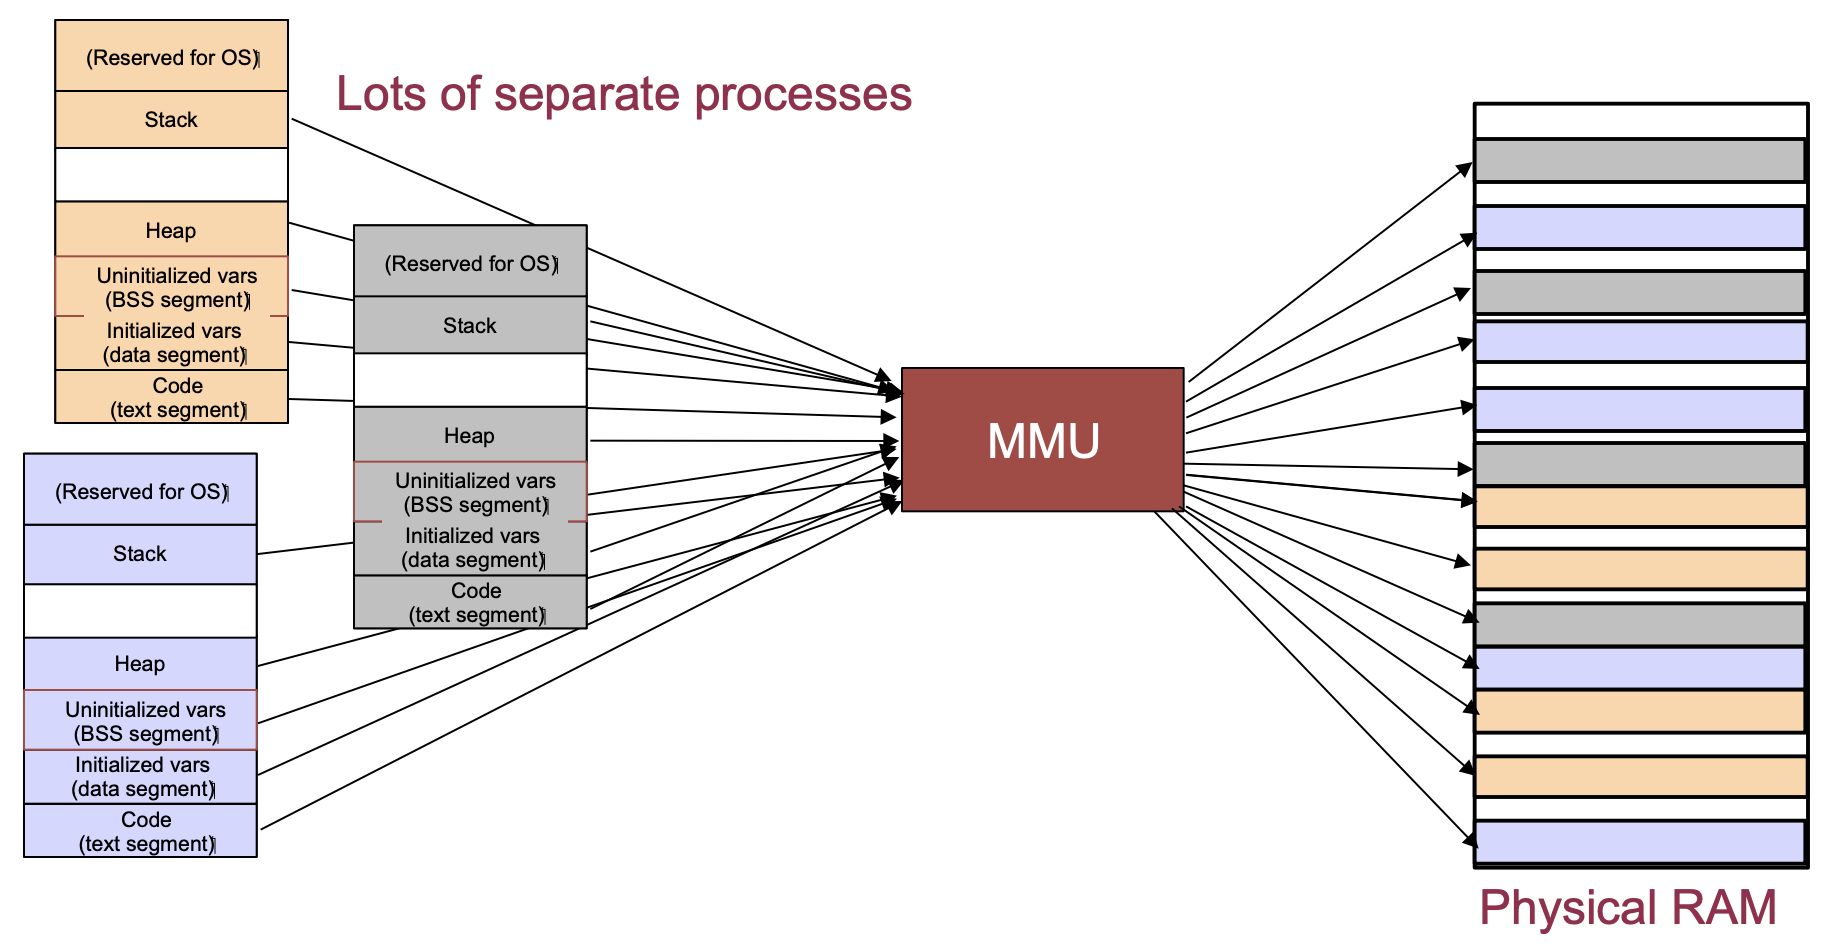
From _University of Illinois CS 241 lecture notes._

Page sizes are typically 4KB, 2MB or 1GB depending on the operating system.

If you access a memory address that is not paged into memory, there is a page
fault while a page is possible evicted and a the memory is loaded from storage
into memory.

## Trends, Sizes and Costs

We'll finish by looking at some representative costs, sizes and computing "laws."

### Costs

* Server GPU: \\$10000-\$30000
* CPU: \\$500-\$1000
* DRAM: \\$5-\$10/Gbyte
* Flash: \\$0.05-\$.01/Gbyte
* Disk: \\$0.01-\$0.02/Gbyte
* Network: \$100 for 10Gbps NIC. Difficult to price network as it depends on where
* Network Transfer: \\$0.02-\$0.14/Gbyte

### Sizes

For a typical server

2 X 2Ghz Intel/ADM processors  
32-128Gbytes of memory  
10-100 Tbytes of storage  
10Gbps Network card    
1-2 KWatts of power

For a typical datacenter

100K - 1M sercers  
1+ MWatt of power
1-10 Pbbs of internal bandwidth, 1-10 Tbps of Internet facing bandwidth
1-10 Exabytes of storage

### Trends

Computers grow fast so we have written some rules of thumb about them

* **Kryder's Law** -- Storage density doubles every 12 months
* **Nielsen's Law** -- Consumer Bandwidth doubles every 20 months
* **Moore's Law** -- CPU capacity doubles every 18 months
* **Metcalfe's Law** -- The value of a Network increases with the square of its members
* **Bell's Law** -- Every 10 years the computing paradigm changes

## In Class Poll

Not visible to published in class.

https://piazza.com/class/m5qyw6267j12cj/post/17 


